In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important; }</style>"))

In [12]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import seaborn as sns
import matplotlib.mlab as ml
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as plticker

def stdfigsize(scale=1, nx=1, ny=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.
    -------
    returns (7*ratio*scale*nx, 7.*scale*ny)
    By default: ratio=1.3
    If ratio<0 them ratio = golden ratio
    """
    if ratio < 0:
        ratio = 1.61803398875
    return((7*ratio*scale*nx, 7*scale*ny))

def stdrcparams(usetex=False):
    """
    Set several mpl.rcParams and sns.set_style for my taste.
    ----
    usetex = True
    ----
    """
    sns.set_style("white")
    sns.set_style({"xtick.direction": "in",
                 "ytick.direction": "in"})
    rcparams = {'text.usetex': usetex,
              'font.family': 'sans-serif',
              'font.sans-serif': ['Helvetica'],
             # 'text.latex.unicode': True,
              'text.latex.preamble': [r"\usepackage[T1]{fontenc}",
                                      r"\usepackage{lmodern}",
                                      r"\usepackage{amsmath}",
                                      r"\usepackage{mathptmx}"
                                      ],
              'axes.labelsize': 30,
              'axes.titlesize': 30,
              'ytick.right': 'on',
              'xtick.top': 'on',
              'xtick.labelsize': '25',
              'ytick.labelsize': '25',
              'axes.linewidth': 1.8,
              'xtick.major.width': 1.8,
              'xtick.minor.width': 1.8,
              'xtick.major.size': 14,
              'xtick.minor.size': 7,
              'xtick.major.pad': 10,
              'xtick.minor.pad': 10,
              'ytick.major.width': 1.8,
              'ytick.minor.width': 1.8,
              'ytick.major.size': 14,
              'ytick.minor.size': 7,
              'ytick.major.pad': 10,
              'ytick.minor.pad': 10,
              'axes.labelpad': 15,
              'axes.titlepad': 15,
              "xtick.direction": "in",
              "ytick.direction": "in",
              'legend.fontsize': 20}
    mpl.rcParams.update(rcparams) 

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = '#3690c0'

stdrcparams(usetex=True)
figsize=stdfigsize(ratio=-1)
xs,ys=figsize

def custom_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x',length=10,direction='out')
    ax.tick_params(axis='x',which='minor',direction='out')
    ax.tick_params(axis='y',length=10,direction='out')
    ax.tick_params(axis='y',which='minor',direction='out')

In [3]:
# load libraries and set plot parameters
import math
import itertools
import numpy as np
import networkx as nx
import pandas as pd
import sys
import random
from datetime import date
from itertools import groupby

In [19]:
df_air = pd.read_pickle('../data/networks/US_air_1990_2018.pkl')
df_air = df_air[df_air.source != df_air.target]
year = list(df_air.index.get_level_values(0).unique())
month = list(df_air.index.get_level_values(1).unique())
graphs_air = []
date_air = []
for y in year:
    for m in month:
#        if y != 2018 or m != 12:
        df = df_air.loc[y,m]
        date_air.append(date(y,m,1))
        G = nx.from_pandas_edgelist(df_air.loc[y,m], edge_attr=True)
        graphs_air.append(G)
        
n = date_air.index(date(2004,1,1))
graphs_air = graphs_air[n:]
date_air =  date_air[n:]

In [5]:
def match_datasets(data):
    allcities=pd.read_csv("../data/buses_list_of_cities.csv",index_col=0,names=["CityUF"],encoding="utf-8")
    allcities.head()    
    allcities["CityUF"]=allcities["CityUF"].str.upper()
    allcities["CityUF"]=allcities["CityUF"].str.strip()
    allcities["CityUF"]=allcities["CityUF"].str.replace(" , ",", ")
    allcities["CityUF"]=allcities["CityUF"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    setallcities=set(list(allcities.CityUF.astype(str)))    
    data=data[data['ORIGEM'].isin(list(setallcities))]
    data=data[data['DESTINO'].isin(list(setallcities))]    
    return data

def bus_network(year=2010,month=12):
    data=pd.read_csv("../data/cleaned_buses_data/{}.csv".format(year),index_col=None)
    if month is not False:
        data=data[data.MES==month]
    data=data[data.NUMEROLUGAROFERTADOIDA>0]
    data=match_datasets(data)
    data=data[["ORIGEM","DESTINO"]]
    data=data.groupby(data.columns.tolist()).size().reset_index().rename(columns={0:'weight'})
    data=data.rename(columns={'ORIGEM':'source','DESTINO':'target','NUMEROLUGAROFERTADOIDA':'weight'})
    return data

df_bus = pd.read_pickle('../data/networks/bus_2005_2014.pkl')
df_bus = df_bus[df_bus.source != df_bus.target]
year = list(df_bus.index.get_level_values(0).unique())
month = list(df_bus.index.get_level_values(1).unique())
graphs_bus = []
date_bus = []
for y in year:
    for m in month:
#        if y != 2018 or m != 12:
        df = bus_network(y,m)
        date_bus.append(date(y,m,1))
        G = nx.from_pandas_edgelist(df, edge_attr=True)
        graphs_bus.append(G)
del df_bus

In [20]:
n_remove = []
n_add = []
for G,H in zip(graphs_air,graphs_air[1::]):
    n_remove.append(len(set(G.edges()).difference(set(H.edges()))))
    n_add.append(len(set(H.edges()).difference(set(G.edges()))))

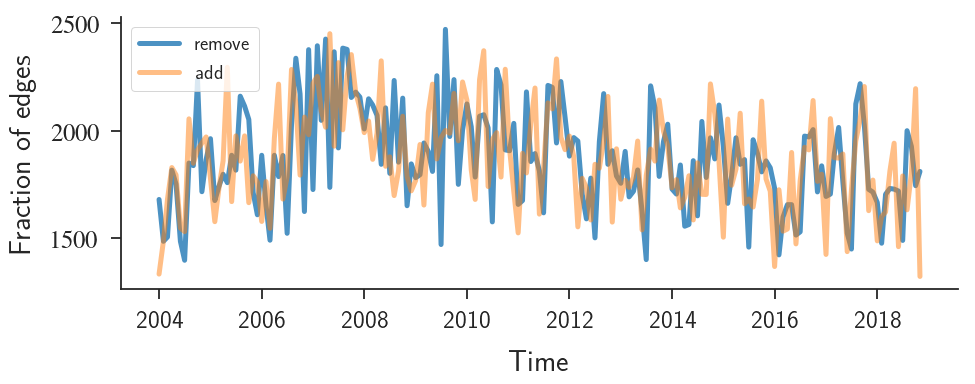

In [21]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(date_air[0:-1],n_remove,label='remove',alpha=0.8)
plt.plot(date_air[0:-1],n_add,label='add',alpha=0.5)
plt.ylabel('Fraction of edges')
plt.xlabel('Time')
plt.legend()
custom_frame(ax)
#plt.savefig('../figures/Fraction_of_Edges_Removed.pdf')
plt.show()

In [23]:
n_remove_bus = []
n_add_bus = []
for G,H in zip(graphs_bus,graphs_bus[1::]):
    n_remove_bus.append(len(set(G.edges()).difference(set(H.edges()))))
    n_add_bus.append(len(set(H.edges()).difference(set(G.edges()))))

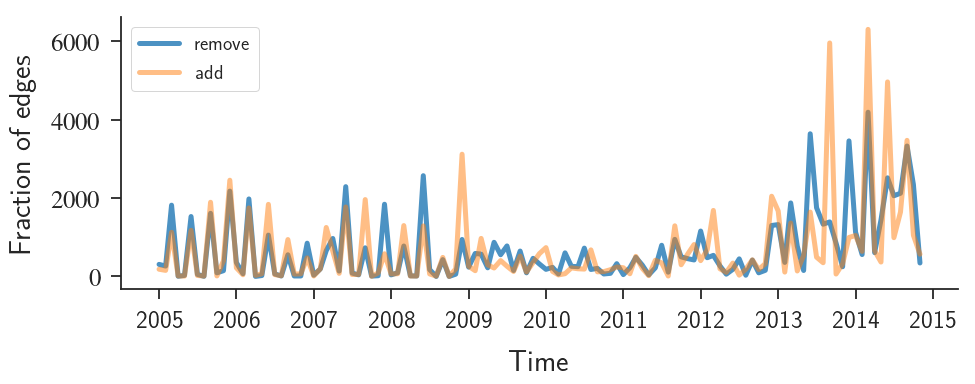

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(date_bus[0:-1],n_remove_bus,label='remove',alpha=0.8)
plt.plot(date_bus[0:-1],n_add_bus,label='add',alpha=0.5)
plt.ylabel('Fraction of edges')
plt.xlabel('Time')
plt.legend()
custom_frame(ax)
#plt.savefig('../figures/Fraction_of_Edges_Removed.pdf')
plt.show()

In [26]:
data = pd.read_pickle('../results/us_air_data_binary_removal.pkl')

In [29]:
n_remove_from_data = [data[data.year == y].label.sum() for y in date_air[0:-1]]

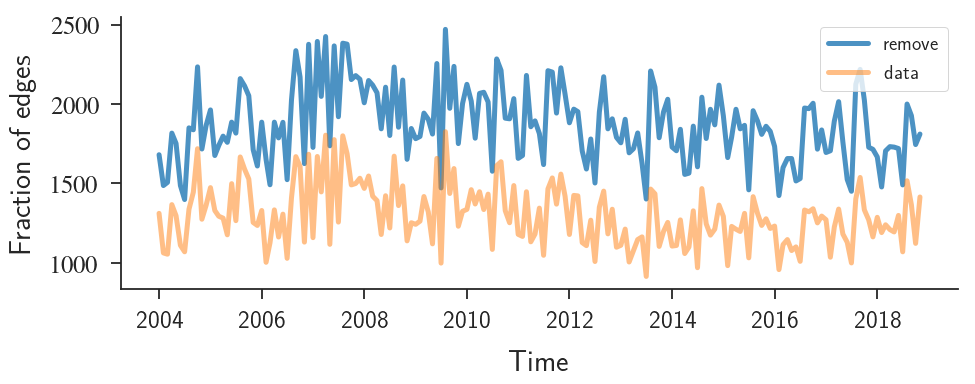

In [31]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(date_air[0:-1],n_remove,label='remove',alpha=0.8)
plt.plot(date_air[0:-1],n_remove_from_data,label='data',alpha=0.5)
plt.ylabel('Fraction of edges')
plt.xlabel('Time')
plt.legend()
custom_frame(ax)
#plt.savefig('../figures/Fraction_of_Edges_Removed.pdf')
plt.show()